In [ ]:
import calendar
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import locale
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
from scipy import sparse

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/Khansamuti/Market-Basket-Analysis-of-IKEA/main/ikea_reviews_data_2022_07_sample.csv"
dataset = pd.read_csv(url, sep = ",", header = "infer")
dataset

,name,link,author,title,review_body,rating,average_rating,source,source_url,uniq_id,scraped_at
0,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,mary b.,Ikea not what it use to be,This review is for the Sektion 3 fronts/4 draw...,3,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22
1,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,Kathleen,looks great,looks great,5,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22
2,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,nanette,I did not buy anything,I did not buy anything I have been trying for ...,1,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22
3,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,PAUL,Extensive renavation,Extensive renavation,5,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22
4,SEKTION / MAXIMERA Base cabinet w/3 fronts & 4...,https://www.ikea.com/us/en/p/sektion-maximera-...,Holly,"Good, could be better",These cabinets/drawers system are great... how...,3,4.1,IKEA,ikea.com,6f368bc0-b51c-5f4e-bbd2-d5d1cca61274,07/16/22
...,...,...,...,...,...,...,...,...,...,...,...
213,"BEGRIPA Handle - turquoise/half-round 5 1/8 """,https://www.ikea.com/us/en/p/begripa-handle-tu...,Dallie,Nice,Love the size and ease of use,5,4.2,IKEA,ikea.com,92d69e22-9947-58dc-969f-e1e8af689bdf,07/16/22
214,"BEGRIPA Handle - turquoise/half-round 5 1/8 """,https://www.ikea.com/us/en/p/begripa-handle-tu...,Hannah,Easy install,Super easy install and easy for our daughter t...,5,4.2,IKEA,ikea.com,92d69e22-9947-58dc-969f-e1e8af689bdf,07/16/22
215,"BEGRIPA Handle - turquoise/half-round 5 1/8 """,https://www.ikea.com/us/en/p/begripa-handle-tu...,KAREN,Goes nicely in my kitchen,Goes nicely in my kitchen,5,4.2,IKEA,ikea.com,92d69e22-9947-58dc-969f-e1e8af689bdf,07/16/22
216,"BEGRIPA Handle - turquoise/half-round 5 1/8 """,https://www.ikea.com/us/en/p/begripa-handle-tu...,LESLIE,You have to make your own holes,You have to make your own holes to use these d...,1,4.2,IKEA,ikea.com,92d69e22-9947-58dc-969f-e1e8af689bdf,07/16/22


In [ ]:
name_count = dataset['name'].value_counts()
name_count

SEKTION / MAXIMERA Base cabinet w/3 fronts & 4 drawers - white/Bodarp gray-green 15x24x30 "                    20
UPPLAND Ottoman - Remmarn light gray                                                                           20
TÄRNÖ Table, outdoor - black/light brown stained 21 5/8x21 1/4 "                                               20
SEKTION / MAXIMERA Base cabinet w 3 fronts/4 drawers - white Axstad/matte blue 24x24x30 "                      20
LAGKAPTEN / ALEX Desk - light green/white 47 1/4x23 5/8 "                                                      20
SEKTION / MAXIMERA Base cabinet w 3 fronts/4 drawers - white/Havstorp turquoise 30x24x30 "                     20
PÅTÅR Espresso coffee beans - organic/UTZ certified/100 % Arabica beans                                        18
SEKTION Base cabinet with 3 drawers - white Maximera/Lerhyttan light gray 15x15x30 "                           13
NÄSSELKLOCKA Cushion cover - off-white/floral pattern 20x20 "                           

In [ ]:
# ambil index dari name_count dimana value count < 3
drop_names = name_count[name_count < 3].index

# buat dataframe baru tanpa data pada variabel name yang termasuk dalam drop_names
dataset = dataset[~dataset['name'].isin(drop_names)]

# tampilkan dataframe baru
df = dataset['name'].value_counts()
df

SEKTION / MAXIMERA Base cabinet w/3 fronts & 4 drawers - white/Bodarp gray-green 15x24x30 "    20
LAGKAPTEN / ALEX Desk - light green/white 47 1/4x23 5/8 "                                      20
SEKTION / MAXIMERA Base cabinet w 3 fronts/4 drawers - white Axstad/matte blue 24x24x30 "      20
UPPLAND Ottoman - Remmarn light gray                                                           20
TÄRNÖ Table, outdoor - black/light brown stained 21 5/8x21 1/4 "                               20
SEKTION / MAXIMERA Base cabinet w 3 fronts/4 drawers - white/Havstorp turquoise 30x24x30 "     20
PÅTÅR Espresso coffee beans - organic/UTZ certified/100 % Arabica beans                        18
SEKTION Base cabinet with 3 drawers - white Maximera/Lerhyttan light gray 15x15x30 "           13
NÄSSELKLOCKA Cushion cover - off-white/floral pattern 20x20 "                                  11
BESTÅ TV unit with drawers and door - white/Laxviken white 70 7/8x16 1/2x15 3/8 "               7
FINNALA Chaise - Tal

In [ ]:
dataset['author'].value_counts()

Janjohn64        6
Karen            4
mary b.          3
MommaCondosta    3
Kathleen         3
                ..
RICHARD          1
Saranne          1
Jonathan         1
LILLIAN          1
KATAOON          1
Name: author, Length: 160, dtype: int64

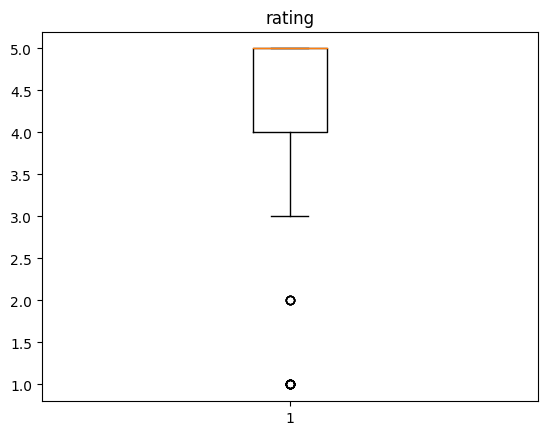

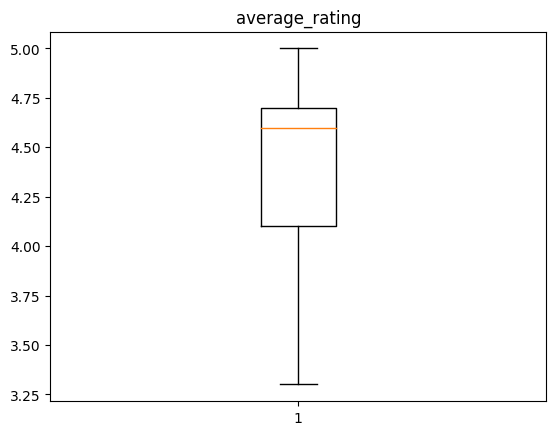

In [ ]:
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Menampilkan boxplot untuk setiap kolom numeric
for col in numeric_cols:
    plt.figure()
    plt.boxplot(dataset[col])
    plt.title(col)

# Menampilkan plot
plt.show()

In [ ]:
dataset.isna().sum()

name              0
link              0
author            0
title             0
review_body       0
rating            0
average_rating    0
source            0
source_url        0
uniq_id           0
scraped_at        0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 217
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            208 non-null    object 
 1   link            208 non-null    object 
 2   author          208 non-null    object 
 3   title           208 non-null    object 
 4   review_body     208 non-null    object 
 5   rating          208 non-null    int64  
 6   average_rating  208 non-null    float64
 7   source          208 non-null    object 
 8   source_url      208 non-null    object 
 9   uniq_id         208 non-null    object 
 10  scraped_at      208 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 19.5+ KB


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=df.index, y=df.values,
            hovertext=df.index, text=df.values, textposition="outside")])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.65)
fig.update_layout(title_text="Ikea's Stuff Review Count", template="plotly_dark")
fig.show()

In [ ]:
item_count_pivot = dataset.pivot_table(index='author',columns='name', values= 'rating',aggfunc='sum').fillna(0)
item_count_pivot[item_count_pivot > 0] =1
item_count_pivot.head(10)

name,"BEGRIPA Handle - turquoise/half-round 5 1/8 ""","BESTÅ TV unit with drawers and door - white/Laxviken white 70 7/8x16 1/2x15 3/8 ""","BRIMNES Storage combination w/glass doors - black 63x13 3/4x74 3/4 """,FINNALA Chaise - Tallmyra black/gray,HÄRLANDA Sleeper sofa - Ljungen light green,IDANÄS Bed frame - dark brown/Luröy Twin,"LAGKAPTEN / ALEX Desk - light green/white 47 1/4x23 5/8 ""","NÄSSELKLOCKA Cushion cover - off-white/floral pattern 20x20 """,PÅTÅR Espresso coffee beans - organic/UTZ certified/100 % Arabica beans,RYET LED bulb E12 200 lumen - chandelier opal,"SEKTION / MAXIMERA Base cabinet w 3 fronts/4 drawers - white Axstad/matte blue 24x24x30 ""","SEKTION / MAXIMERA Base cabinet w 3 fronts/4 drawers - white/Havstorp turquoise 30x24x30 ""","SEKTION / MAXIMERA Base cabinet w/3 fronts & 4 drawers - white/Bodarp gray-green 15x24x30 ""","SEKTION Base cabinet with 3 drawers - white Maximera/Lerhyttan light gray 15x15x30 ""","SÖDERHAMN Sectional, 4-seat with chaise - Tonerud gray","TROFAST Wall storage - light white stained pine 36 5/8x11 3/4 ""","TÄRNÖ Table, outdoor - black/light brown stained 21 5/8x21 1/4 """,UPPLAND Ottoman - Remmarn light gray
author,,,,,,,,,,,,,,,,,,
22 VOL Robin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC_Atlanta,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADRINEH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALLISON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANGIE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Alison M.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Angie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Anne,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AnneIndy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Keterangan Olah Dataset
print('Dimensi Dataset Berdasarkan Author:',item_count_pivot.shape)
print('Jumlah Reviewer Item :',item_count_pivot.shape[0])
print('Jumlah Item :',item_count_pivot.shape[1])

Dimensi Dataset Berdasarkan Author: (160, 18)
Jumlah Reviewer Item : 160
Jumlah Item : 18


In [ ]:
freq = apriori(item_count_pivot, min_support= 0.005, use_colnames= True)
freq.sort_values('support',ascending=False)

,support,itemsets
17,0.12500,(UPPLAND Ottoman - Remmarn light gray)
16,0.12500,"(TÄRNÖ Table, outdoor - black/light brown stai..."
29,0.11875,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...
27,0.11875,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...
26,0.11875,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...
25,0.11875,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...
6,0.11875,(LAGKAPTEN / ALEX Desk - light green/white 47 ...
10,0.11875,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...
11,0.11875,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...
12,0.11875,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...


In [ ]:
freq2 = apriori(item_count_pivot, min_support= 0.01, use_colnames= True)
freq2.sort_values('support',ascending=False)

,support,itemsets
17,0.12500,(UPPLAND Ottoman - Remmarn light gray)
16,0.12500,"(TÄRNÖ Table, outdoor - black/light brown stai..."
11,0.11875,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...
10,0.11875,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...
20,0.11875,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...
19,0.11875,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...
18,0.11875,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...
12,0.11875,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...
21,0.11875,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...
6,0.11875,(LAGKAPTEN / ALEX Desk - light green/white 47 ...


In [ ]:
print("Panjang data dengan Min support 0.005 adalah",len(freq))
print("Panjang data dengan Min support 0.01 adalah",len(freq2))

Panjang data dengan Min support 0.005 adalah 30
Panjang data dengan Min support 0.01 adalah 22


In [ ]:
rules = association_rules(freq,metric='lift',min_threshold=1)[['antecedents','consequents','support','confidence','lift']]
rules.sort_values(by=['support','confidence','lift'],ascending=False)

,antecedents,consequents,support,confidence,lift
10,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.000000,8.421053
11,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.000000,8.421053
12,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.000000,8.421053
13,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,0.11875,1.000000,8.421053
14,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.000000,8.421053
15,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,0.11875,1.000000,8.421053
22,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.000000,8.421053
23,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.000000,8.421053
24,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,0.11875,1.000000,8.421053
25,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.000000,8.421053


In [ ]:
rules2 = association_rules(freq2,metric='lift',min_threshold=1)[['antecedents','consequents','support','confidence','lift']]
rules2.sort_values(by=['support','confidence','lift'],ascending=False)

,antecedents,consequents,support,confidence,lift
0,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.0,8.421053
1,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.0,8.421053
2,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.0,8.421053
3,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,0.11875,1.0,8.421053
4,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.0,8.421053
5,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,0.11875,1.0,8.421053
6,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.0,8.421053
7,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.0,8.421053
8,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,0.11875,1.0,8.421053
9,(SEKTION / MAXIMERA Base cabinet w/3 fronts & ...,(SEKTION / MAXIMERA Base cabinet w 3 fronts/4 ...,0.11875,1.0,8.421053


In [ ]:
print("Banyaka variasi dengan Min support 0.005 adalah",len(rules))
print("Panjang data dengan Min support 0.01 adalah",len(rules2))

Banyak variasi dengan Min support 0.005 adalah 28
Banyak variasi dengan Min support 0.01 adalah 12
